In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
X = df.drop('survived', axis=1)
y = df['survived']

In [17]:
X.shape

(891, 14)

In [4]:
numerical_features = ['age', 'fare']
categorical_features = X.select_dtypes(include=['object','category']).columns


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [6]:
numerical_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

X_processed = preprocessor.fit_transform(X)

In [16]:
X_processed.shape

(891, 25)

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_lda = lda.fit_transform(X_processed,y)

In [13]:
x_lda

array([[-1.31868105e+00],
       [ 2.11526201e+00],
       [ 7.96501449e-01],
       [ 1.76329341e+00],
       [-1.50584471e+00],
       [-1.14010526e+00],
       [ 3.06200958e-01],
       [ 2.08595666e-01],
       [ 7.83097892e-01],
       [ 1.76073656e+00],
       [ 4.60394791e-01],
       [ 1.42332711e+00],
       [-1.28959516e+00],
       [-1.55617754e+00],
       [ 6.10574453e-01],
       [ 1.13463882e+00],
       [ 5.00327236e-01],
       [-6.74190754e-01],
       [ 7.27599633e-01],
       [ 1.13242837e+00],
       [-7.46506659e-01],
       [-2.00157250e-02],
       [ 8.85402710e-01],
       [ 1.33867316e-01],
       [ 7.01248986e-01],
       [ 6.30910527e-01],
       [-1.04020753e+00],
       [-1.12396494e-01],
       [ 1.03234779e+00],
       [-1.42947251e+00],
       [-9.99628346e-02],
       [ 2.70680669e+00],
       [ 1.03230699e+00],
       [-1.19831681e+00],
       [ 9.02304026e-02],
       [-5.10606297e-01],
       [-1.04020621e+00],
       [-1.30401180e+00],
       [ 9.1

In [20]:
import matplotlib.pyplot as plt
import numpy as np

df_lda = pd.DataFrame(x_lda, columns=['LDA1'])
df_lda['survived'] = y.values

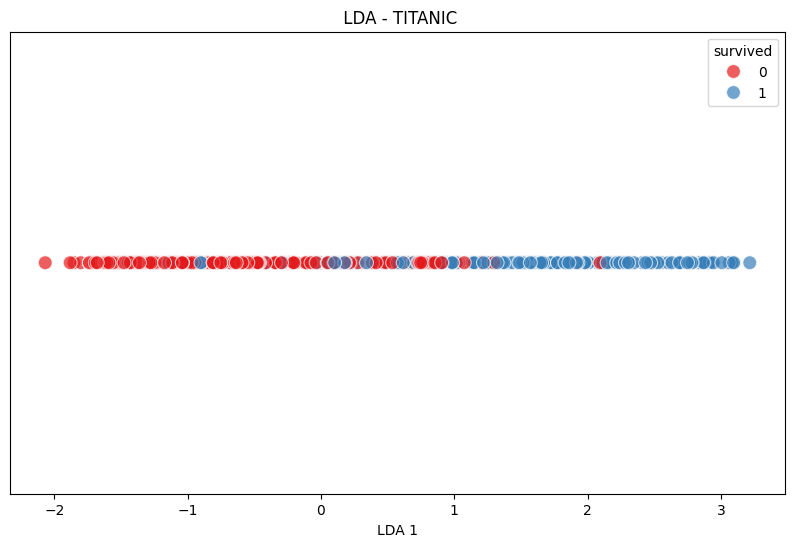

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_lda, x='LDA1', y=np.zeros_like(df_lda['LDA1']), hue='survived', palette='Set1', s=100, alpha=0.7)
plt.title(' LDA - TITANIC')
plt.xlabel('LDA 1')
plt.yticks([])
plt.show()